In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk import word_tokenize
tt = TweetTokenizer()
from collections import Counter
from string import punctuation
import numpy as np
from sklearn import cluster
from sklearn.metrics.pairwise import cosine_similarity
matplotlib.rcParams.update({'figure.autolayout': True})

In [64]:
df = pd.read_csv('HC.csv')

In [65]:
df['historia_clinica'] = df['historia_clinica'].str.replace(',',' ')
df ['historia_clinica']= df['historia_clinica'].str.replace(' S. ',' sindrome ')

In [66]:
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('años','anos')
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('mama','seno')

In [67]:
remove_words = ['paciente','pacientes','gen','secuenciacion','molecular','tipo','mas']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['historia_clinica'] = df['historia_clinica'].str.replace(pat,' ')

In [68]:
df['historia_clinica']

0        con cuadro clinico compatible con crisis feb...
1      sospecha craneosinostosis por abombamiento fro...
2      tumor maligno de retina    sin riesgo cardiova...
3        con crisis compulsivas  con crisis donde hub...
4      prueba para el complejo de esclerosis tuberosa...
5      sindrome de hipermovilidad  miopia degenerativ...
6                                      fibrosis quistica
7      distrofia muscular progresiva en estudio duche...
8        con evidencia de retinoblatoma bilateral  co...
9                   agamaglobulinemia hereditaria bruton
10     sospecha de enfermedad rara  con retraso del n...
11                                   cáncer de seno t3\n
12                    estudio   de esclerosis tuberosa\n
13     sospecha de pseudoacondroplasia    con acortam...
14       con antecedentes de enfermedad metabolica no...
15                         epilepsia mioclonica severa\n
16       con 2 hijos fallecidos en periodo neonatal  ...
17     baja talla por deficienc

In [69]:
df = df.rename(columns={'historia_clinica': 'HC'})

In [70]:
df1 = df[['id','HC']]

In [71]:
df1.head()

,id,HC
0,1,con cuadro clinico compatible con crisis feb...
1,2,sospecha craneosinostosis por abombamiento fro...
2,3,tumor maligno de retina sin riesgo cardiova...
3,4,con crisis compulsivas con crisis donde hub...
4,5,prueba para el complejo de esclerosis tuberosa...


In [72]:
df1.to_csv('hc1.csv', index = False)

In [73]:
df2 = pd.read_csv('hc1.csv')

In [74]:
top_N = 30

In [75]:
txt = df2.HC.str.lower().str.replace(r'.', ' ').str.cat(sep= ' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

In [76]:
stopwords = nltk.corpus.stopwords.words('spanish')+ list(punctuation)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Términos', 'Frecuencias']).set_index('Términos')
rslt.head()

/home/jennifer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


,Frecuencias
Términos,
seno,66
cancer,60
sindrome,57
sospecha,33
anos,31


In [15]:
frecuencias = rslt.sort_values(by='Frecuencias',ascending=[True])

In [16]:
frecuencias.head()

,Frecuencias
Términos,
compromiso,11
derecho,12
manejo,12
retardo,12
1,13


/home/jennifer/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


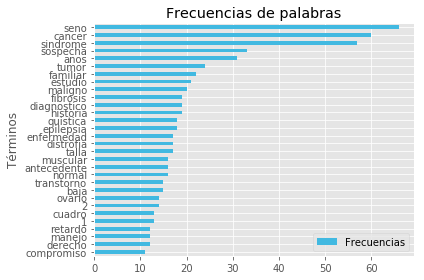

In [17]:
plot = frecuencias.plot(kind="barh", title = 'Frecuencias de palabras' , color = [('#41b9e1')]);
fig = plot.get_figure();
fig.savefig("frecuecias.png", bbox_inches=0)

In [18]:
idf = pd.read_csv('idffrecuencias1.csv') #calculado con R
del idf['Unnamed: 0']

In [19]:
idf_plot = idf.sum()

In [20]:
idf_plot.head()

canalopatia       13.665780
clinico           45.229816
compatible        27.554810
consentimiento    18.743783
considera         41.966685
dtype: float64

In [99]:
IDF = pd.DataFrame({'Términos':idf_plot.index, 'frecuencias':idf_plot.values})
q = IDF.sort_values(by=['frecuencias'],ascending=[False]).set_index('Términos')
idf_p = q.head(30)
idf_p

,frecuencias
Términos,
seno,168.134194
cancer,157.406199
sindrome,129.863166
anos,99.279842
sospecha,94.996892
tumor,82.454138
familiar,80.585230
maligno,74.908543
ovario,73.470985


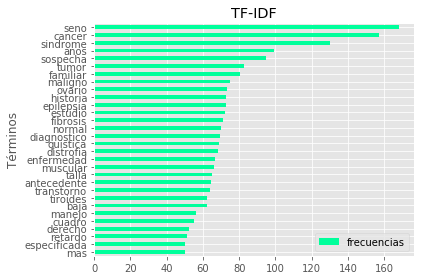

In [104]:
plot = idf_p.plot(kind="barh", title = 'TF-IDF' , color = [('#00FF9B')]);
fig = plot.get_figure();
plt.gca().invert_yaxis();
fig.savefig("TFIDF1.png",bbox_inches=0)

In [105]:
idf1 = pd.read_csv('idffrecuencias1.csv') #calculado con R

In [106]:
idf1 = idf1.rename(columns={'Unnamed: 0': 'DOC'})
del idf1['DOC']
idf1.head()

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
0,6.83289,5.025535,5.510962,6.247928,4.662965,5.025535,4.247928,6.83289,6.247928,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,6.247928,0.000000,0.000000,0.000000,0.00000,0.000000,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,6.247928,0.000000,0.000000,0.000000,0.00000,0.000000,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.000000,0.000000,0.000000,10.051070,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
mean_idf = idf1.mean(0)

In [108]:
mean_idf.head()

canalopatia       0.059938
clinico           0.198376
compatible        0.120854
consentimiento    0.082210
considera         0.184064
dtype: float64

In [109]:
resta = idf1 - mean_idf

In [110]:
norma = np.sqrt(np.diag(np.dot(resta.T, resta))) #calculo de la norma

Se calcula a partir de multiplicar la matriz transpuesta por si misma, esto proporciona una matriz cuadrada cuya diagonal esta formada por las normas al cuadrado, la raiz cuadrada de esta diagonal corresponde al vector de las normas de los campos de la matriz.

In [111]:
normalizado = resta/norma

In [112]:
normalizado

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
0,0.703999,0.270119,0.442283,0.573539,0.326688,0.270119,0.249725,0.703999,0.573539,0.573539,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396
1,-0.006230,-0.011101,-0.009917,0.573539,-0.013426,-0.011101,-0.015100,-0.006230,-0.007647,0.573539,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396
2,-0.006230,-0.011101,-0.009917,0.573539,-0.013426,-0.011101,-0.015100,-0.006230,-0.007647,0.573539,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396
3,-0.006230,-0.011101,-0.009917,-0.007647,-0.013426,0.551338,-0.015100,-0.006230,-0.007647,-0.007647,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396
4,-0.006230,-0.011101,-0.009917,-0.007647,-0.013426,-0.011101,-0.015100,-0.006230,-0.007647,-0.007647,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396
5,-0.006230,-0.011101,-0.009917,-0.007647,-0.013426,-0.011101,-0.015100,-0.006230,-0.007647,-0.007647,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396
6,-0.006230,-0.011101,-0.009917,-0.007647,-0.013426,-0.011101,-0.015100,-0.006230,-0.007647,-0.007647,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396
7,-0.006230,-0.011101,-0.009917,-0.007647,-0.013426,-0.011101,-0.015100,-0.006230,-0.007647,-0.007647,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396
8,-0.006230,-0.011101,-0.009917,-0.007647,-0.013426,-0.011101,-0.015100,-0.006230,-0.007647,-0.007647,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396
9,-0.006230,-0.011101,-0.009917,-0.007647,-0.013426,-0.011101,-0.015100,-0.006230,-0.007647,-0.007647,...,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396,-0.004396


In [113]:
comprobacion = np.sqrt(np.diag(np.dot(normalizado.T, normalizado))) # Comprobacion de la normlizacion......
c = pd.DataFrame(comprobacion)
c.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [114]:
k = 4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(normalizado)
clusters1 = kmeans.labels_

In [115]:
dist = cosine_similarity(normalizado)

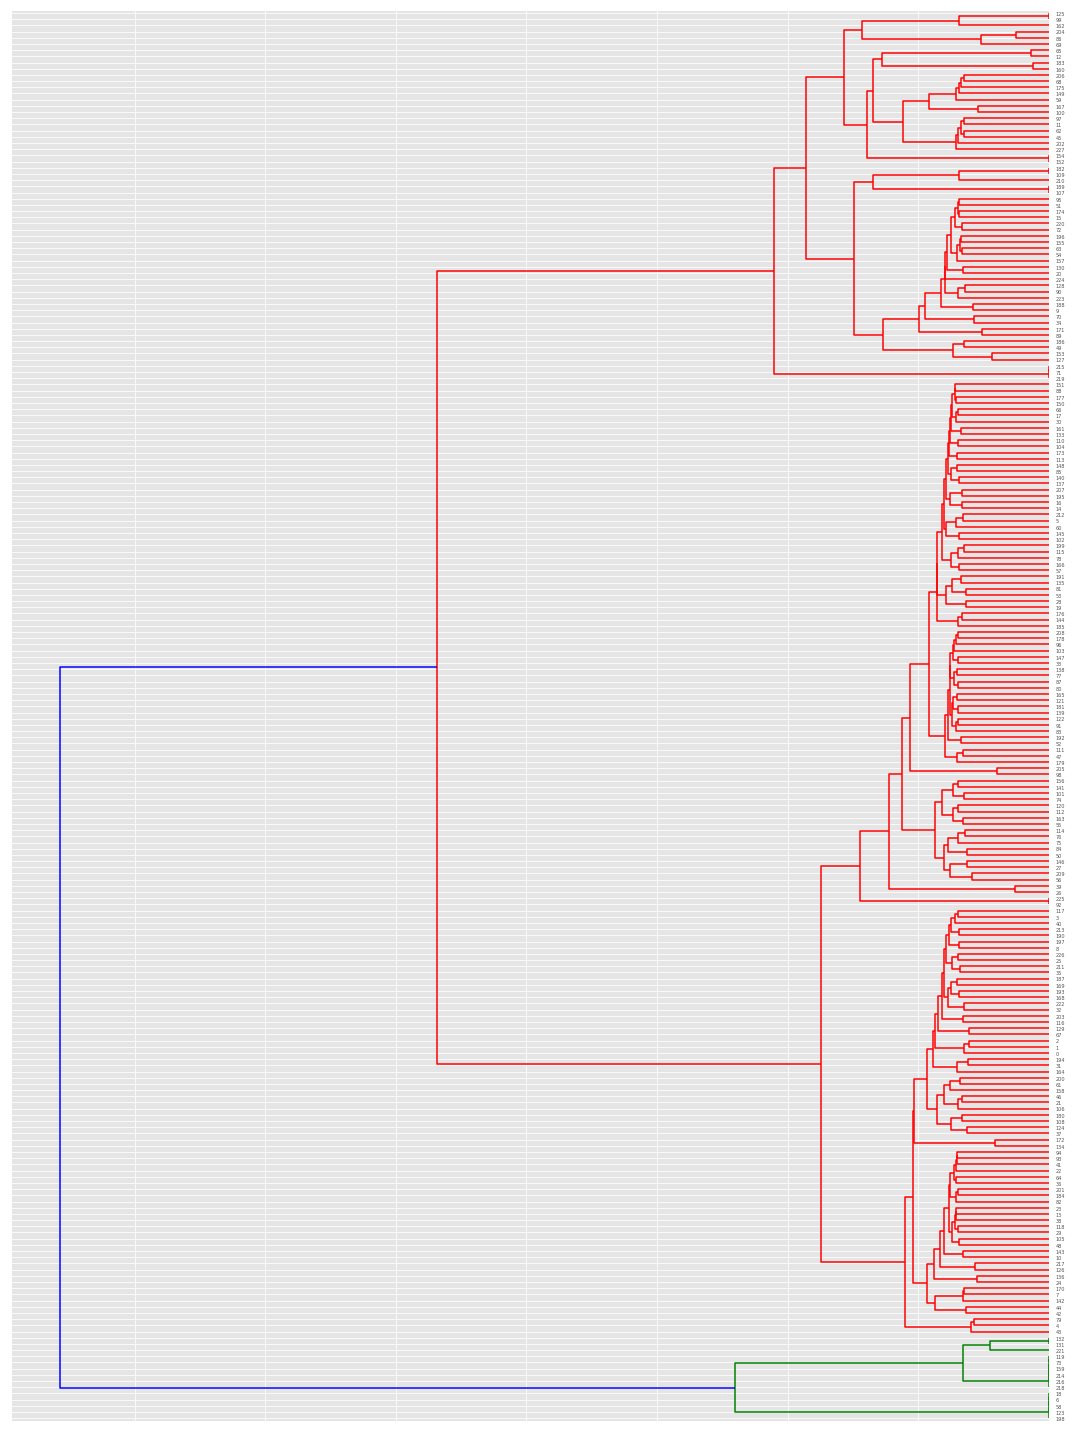

In [117]:
from scipy.cluster.hierarchy import average, dendrogram
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances\n",
fig, ax = plt.subplots(figsize=(15, 20)) # set size\n",
ax = dendrogram(linkage_matrix, orientation="left");
plt.tick_params(axis= 'x',          # changes apply to the x-axis\n",
                which='both',      # both major and minor ticks are affected\n",
                bottom='off',      # ticks along the bottom edge are off\n",
                top='off',         # ticks along the top edge are off\n",
                labelbottom='off'),
plt.tight_layout() #show plot with tight layout\n",
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters"